In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_on_2D,generate_sphere_points,save_sparse_matrix,load_sparse_matrix
import scipy.io
import sounddevice as sd
import soundfile as sf
import math
from collections import Counter






band 0
window 7
18.774569988250732 secs
band 1
window 7
17.3735249042511 secs
band 2
window 7
19.385821104049683 secs
band 3
window 7
18.091439962387085 secs
band 4
window 7
17.446314096450806 secs
band 5
window 7
17.82726502418518 secs
band 6
window 7
17.129521369934082 secs
band 7
window 7
16.326245069503784 secs
band 8
window 7
17.671125888824463 secs
band 9
window 7
17.618231058120728 secs
band 10
window 7
17.539106130599976 secs
band 11
window 7
17.479321241378784 secs
band 12
window 7
16.9985568523407 secs
band 13
window 7
16.46422004699707 secs
band 14
window 7
18.61670708656311 secs
band 15
window 7
18.15121102333069 secs
band 16
window 7
17.45907688140869 secs
band 17
window 7
18.277019739151 secs
band 18
window 7
18.189031839370728 secs
band 19
window 7
18.136838912963867 secs
band 20
window 7
17.58916211128235 secs
band 21
window 7
21.62913489341736 secs
band 22
window 7
19.829374074935913 secs
band 23
window 7
17.3988778591156 secs
band 24
window 7
21.48392128944397 secs
ba

OSError: 3735244800 requested and 2415918080 written

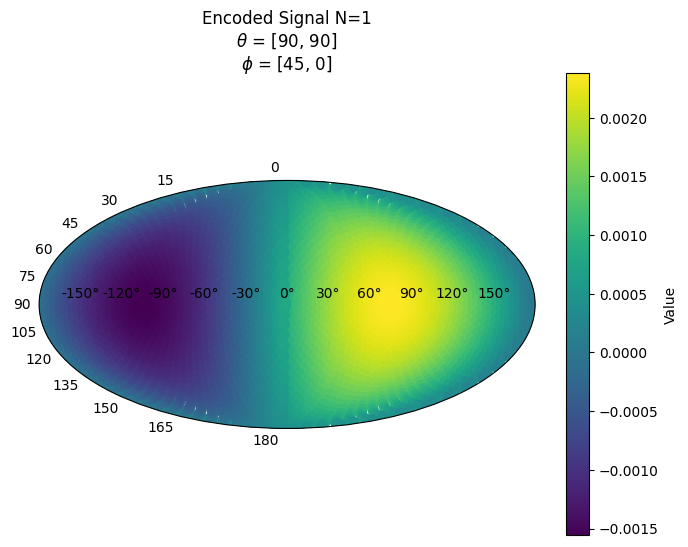

In [1]:
%run main.py
data = s_subbands


In [2]:
file ='data/output/male_speech_female_speech_FBbins_1_grid_lebedev_th_90_90_ph_45_0_N_input_1_Correct_Mask.npy'
data = np.load(file)

In [7]:
data = load_sparse_matrix('data/output/male_speech_female_speech_FBbins_45_grid_lebedev_th_90_90_ph_45_0_N_input_1_Correct_Mask.npy')

In [8]:

num_windows = data.shape[0]
num_bands = data.shape[1]
P = data.shape[2]
tau = data.shape[3]
ph = file.split('ph_')[1].split('_N_input')[0].split('.npy')[0].replace('_',',')
th = file.split('th_')[1].split('_ph')[0].replace('_',',')
print(f"{num_windows=}\n{tau=}\n{num_bands=}\n{P=}")


if 'lebedev' in file:
    lebedev = scipy.io.loadmat('Lebvedev2702.mat')
    P_th = lebedev['th'].reshape(-1)
    P_ph = lebedev['ph'].reshape(-1)
    P_ph = (P_ph + np.pi) % (2 * np.pi) - np.pi #wrap angles to [-pi,pi]
else:
    points= generate_sphere_points(P,plot=False)
    P_th = points[:,1]
    P_ph = points[:,2]


num_windows=30
tau=1024
num_bands=1
P=2702


## Plot

/Users/amitmilstein/Documents/Ben_Gurion_Univ/PhD/Repos/Ambisonics_Upscaling/utils.py:350: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 6))


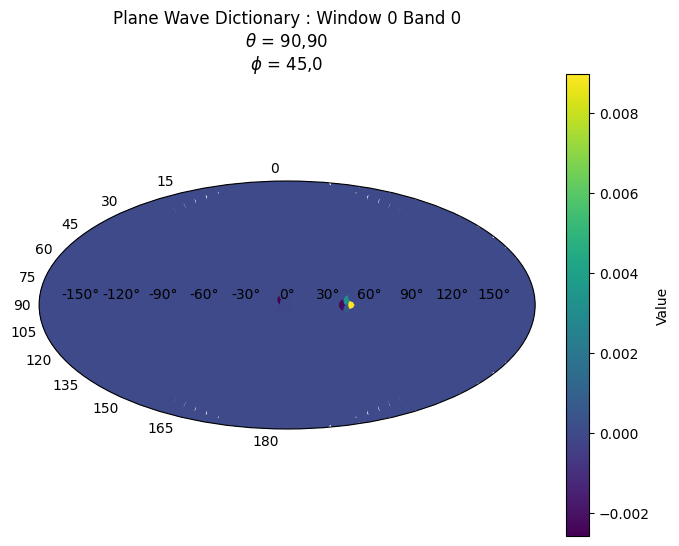

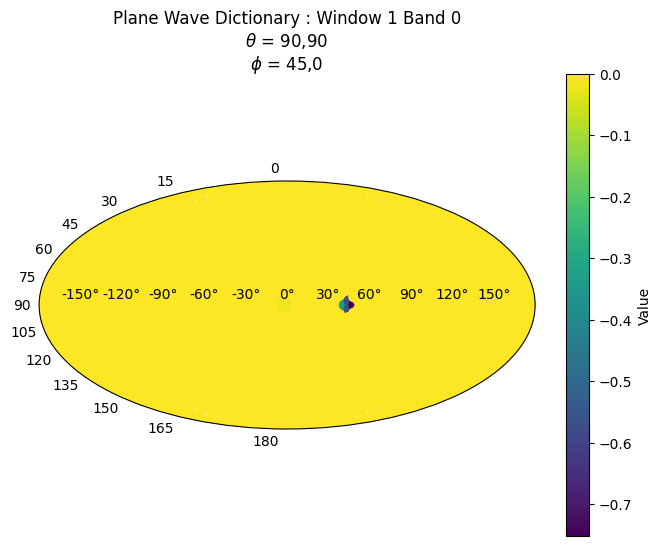

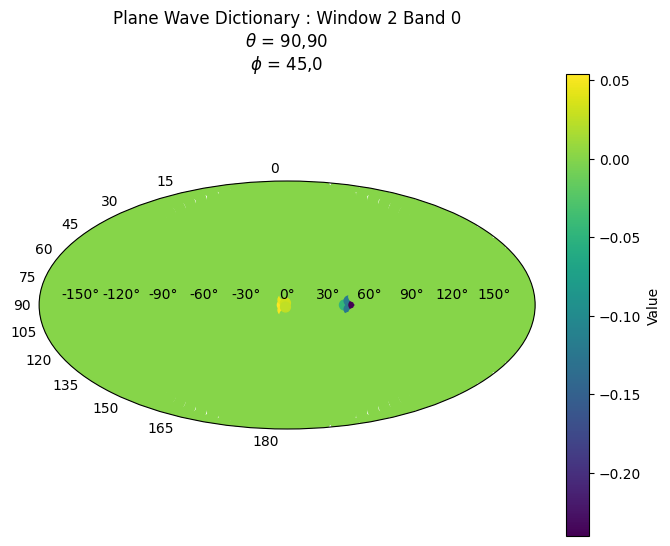

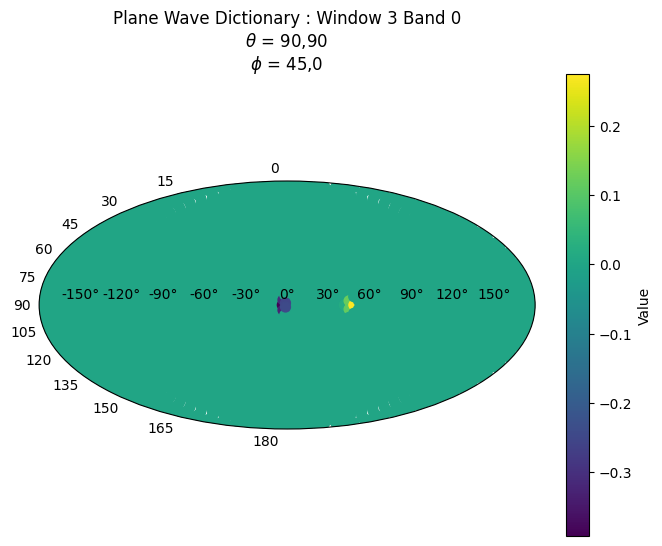

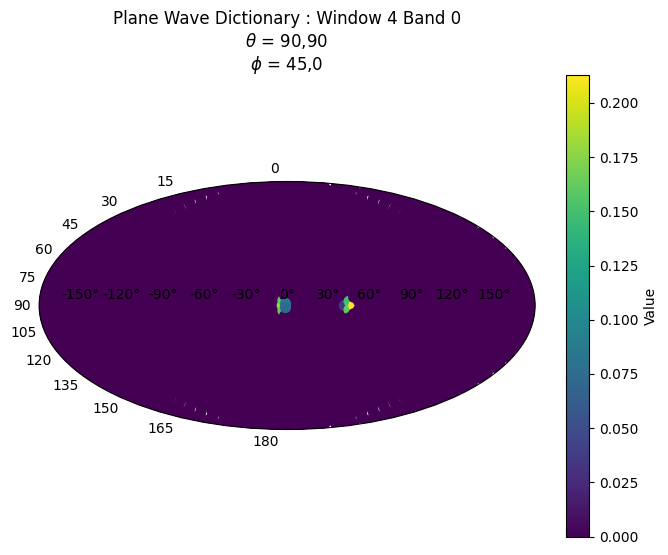

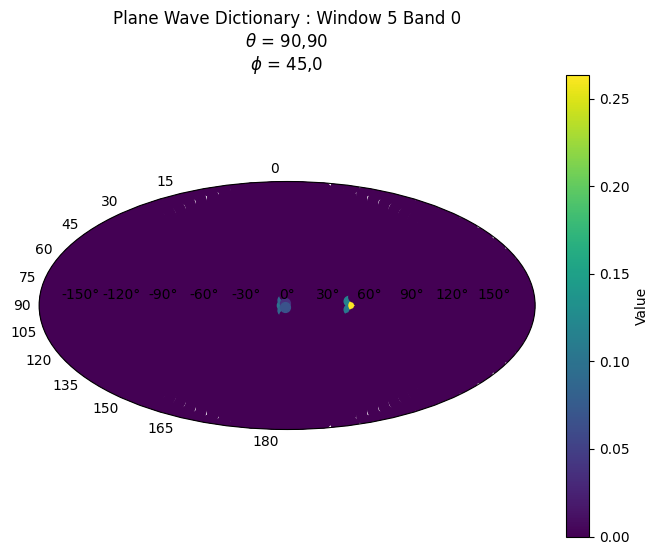

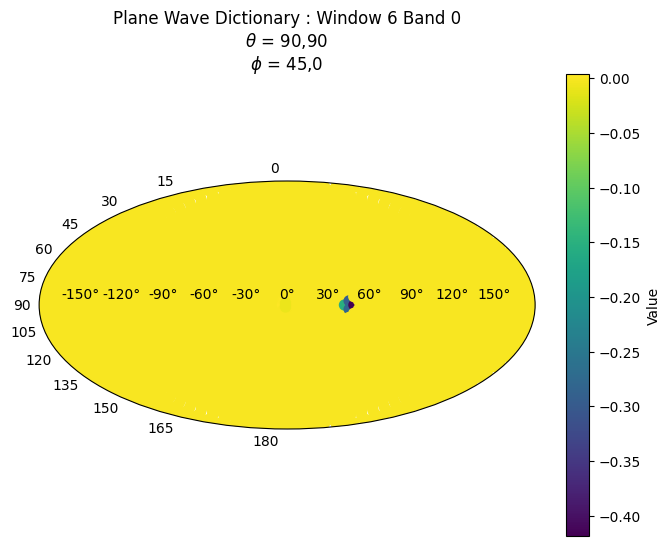

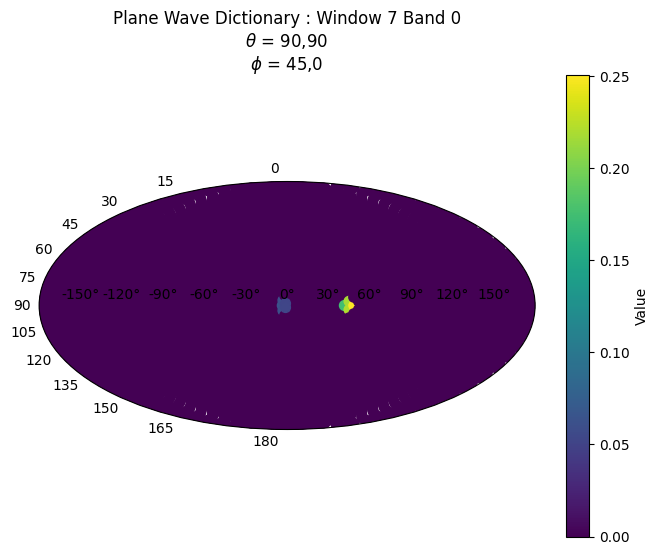

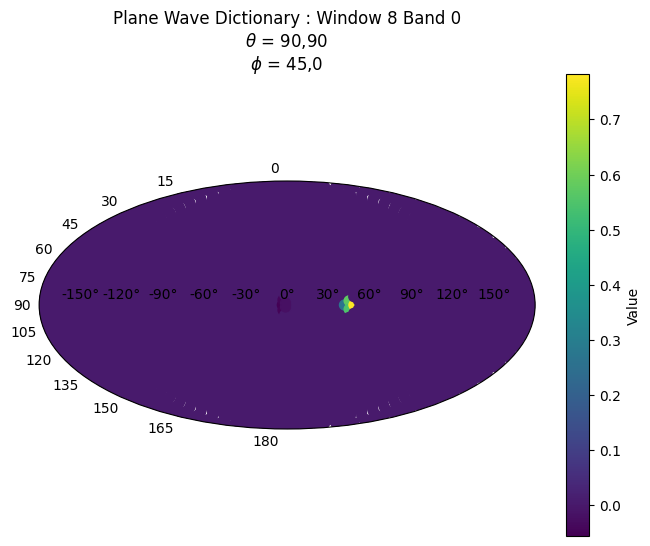

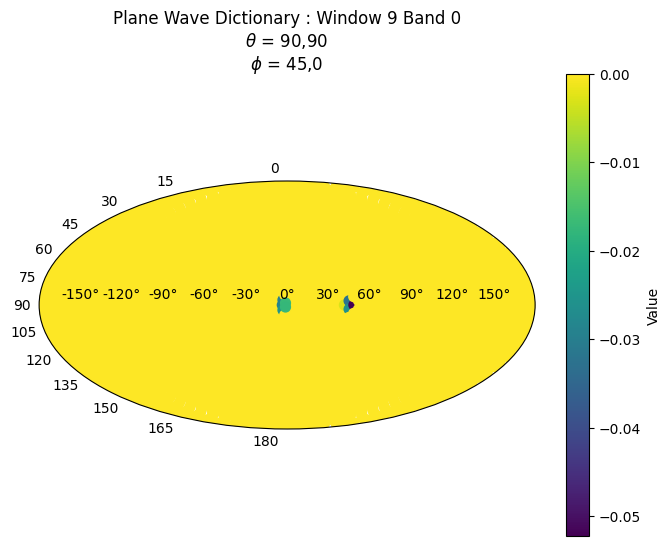

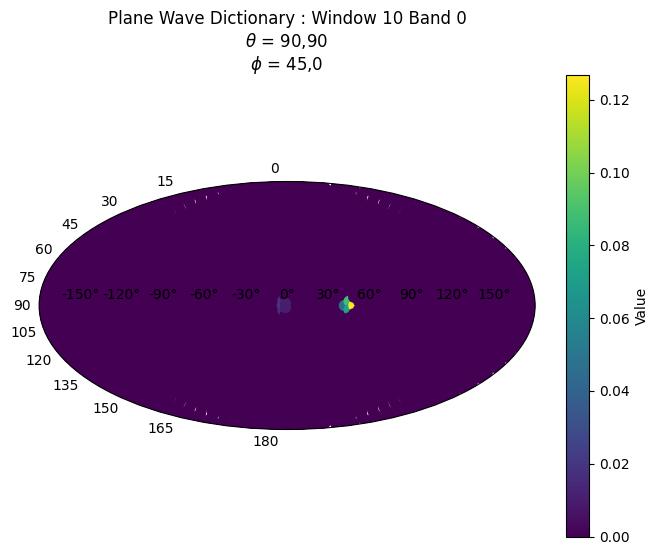

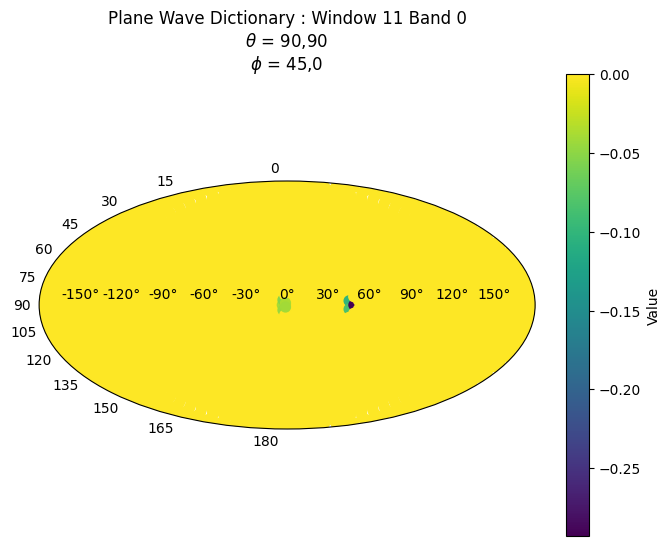

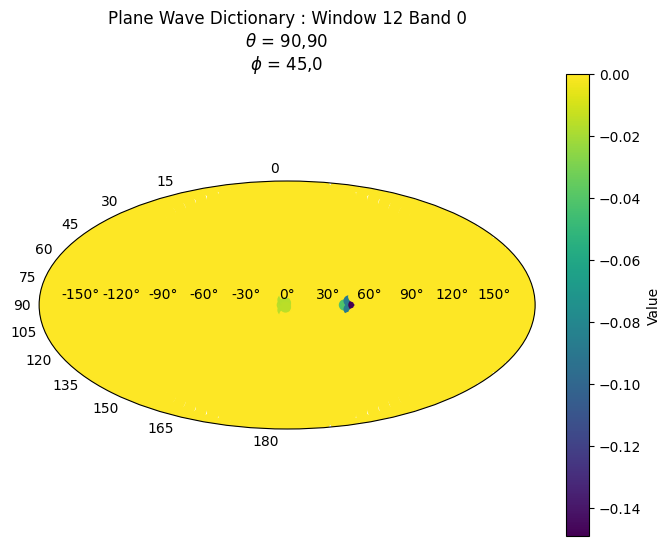

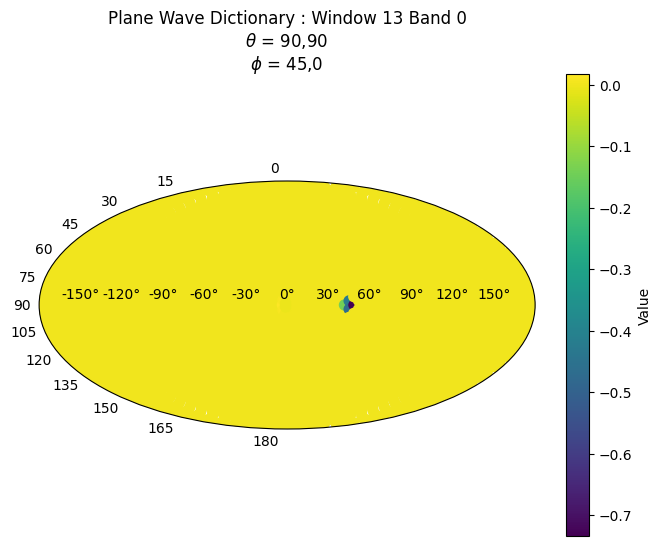

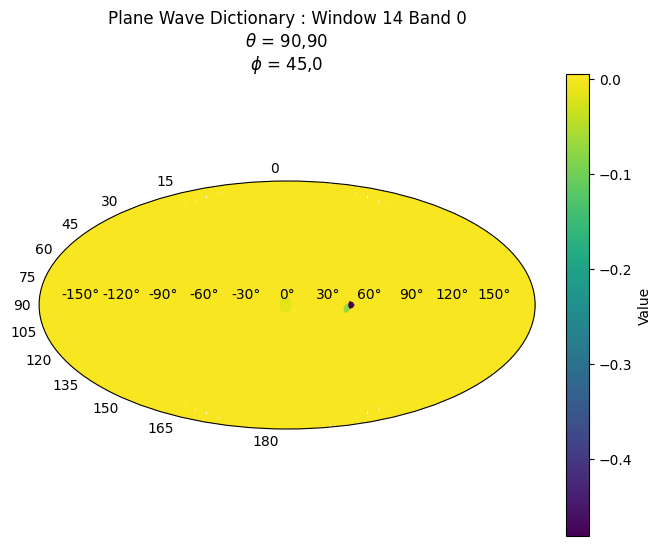

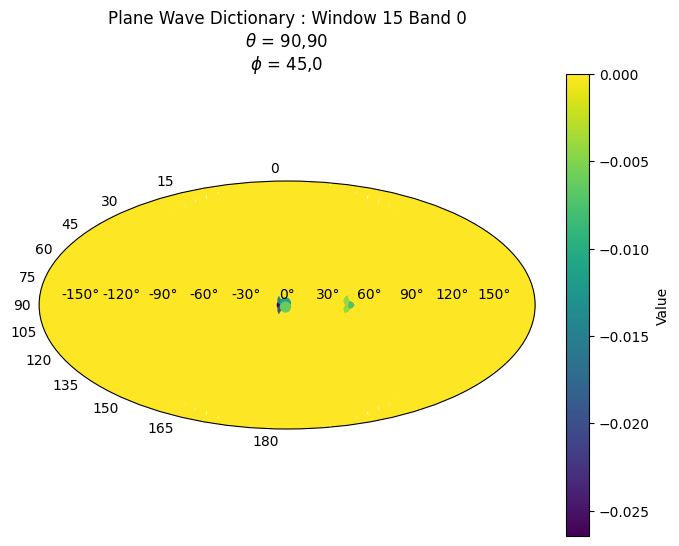

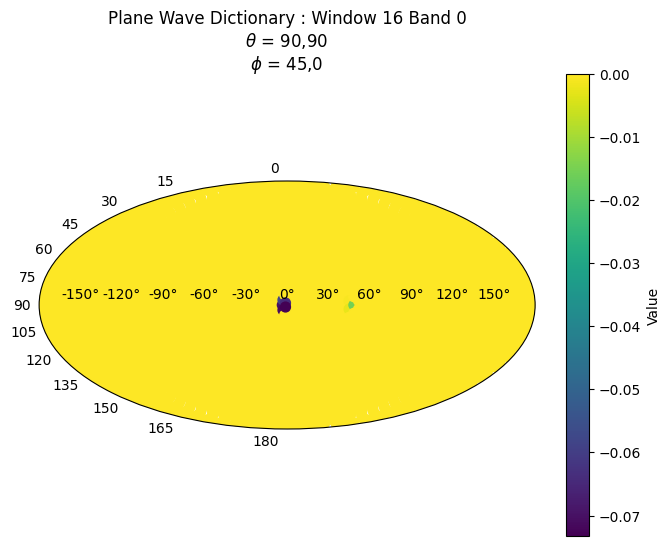

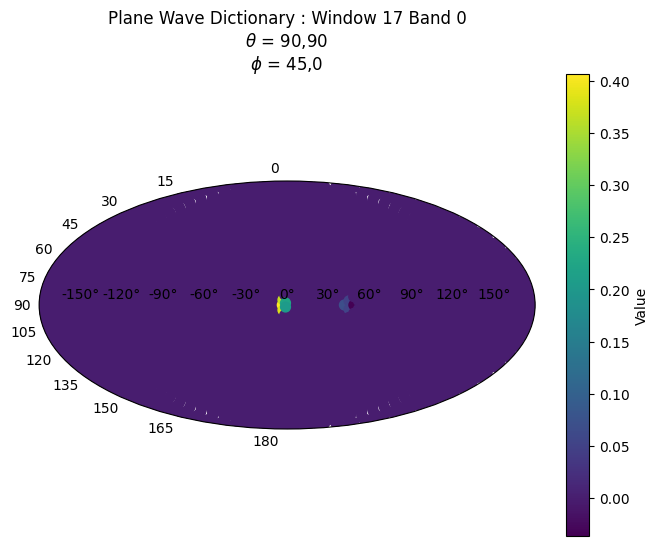

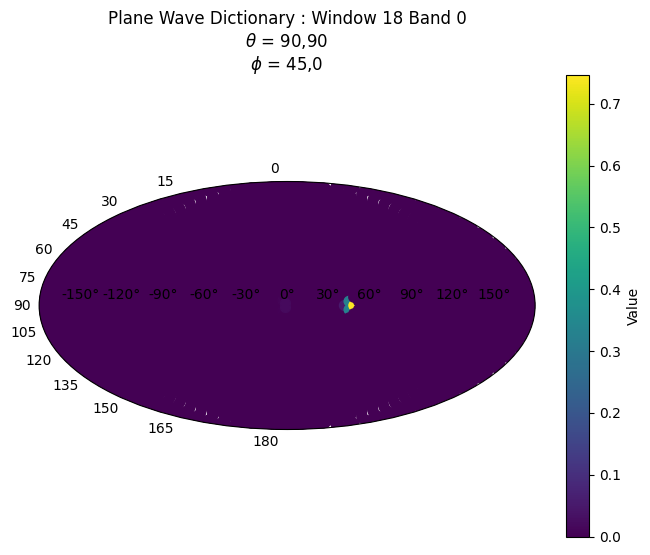

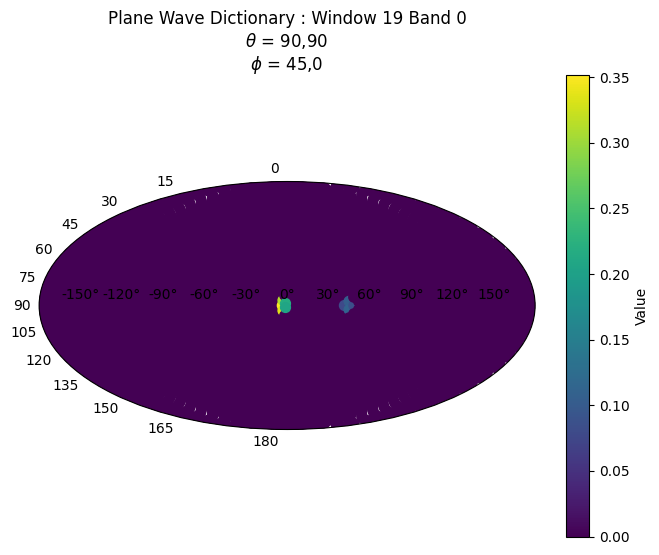

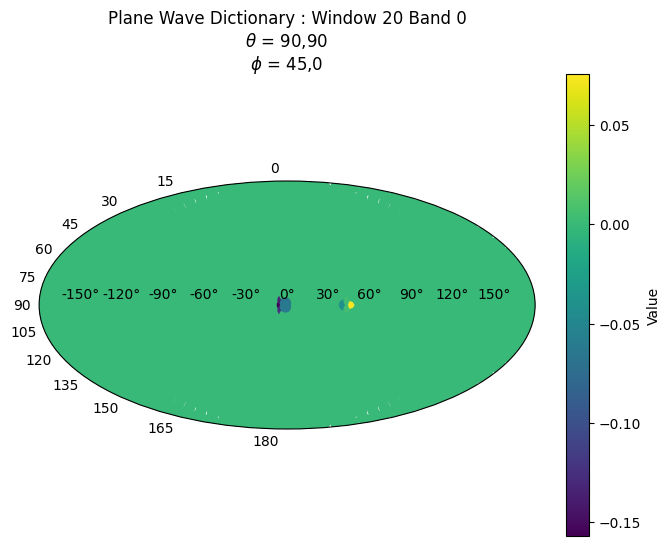

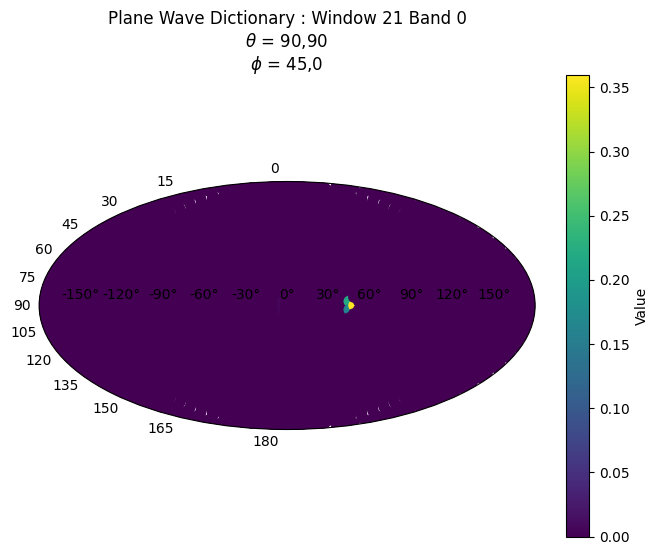

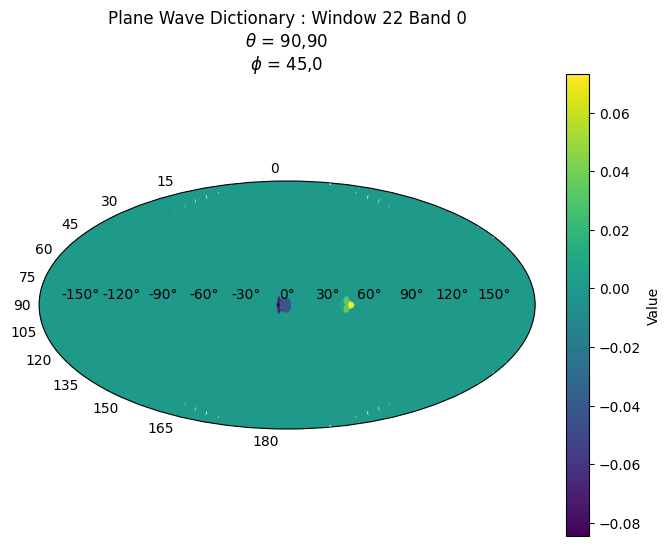

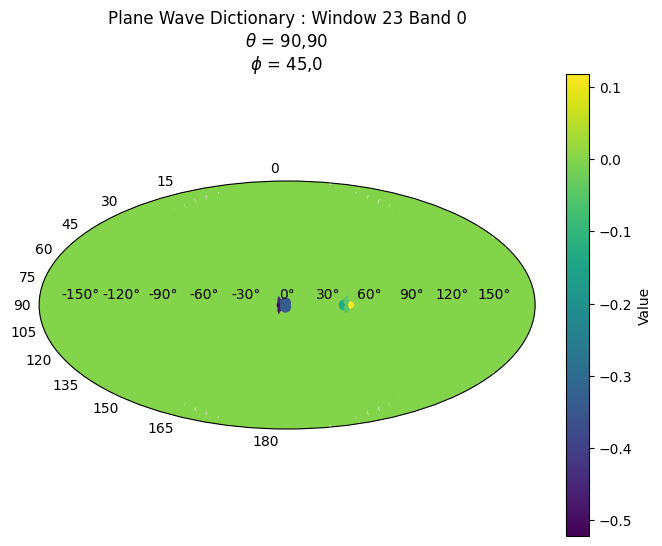

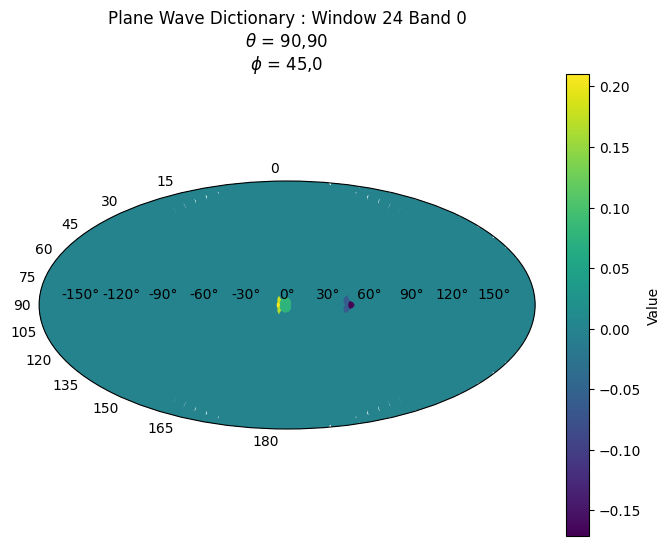

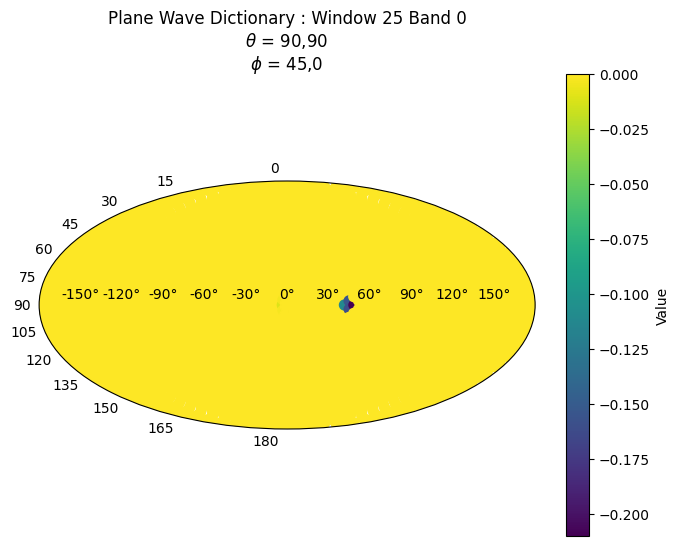

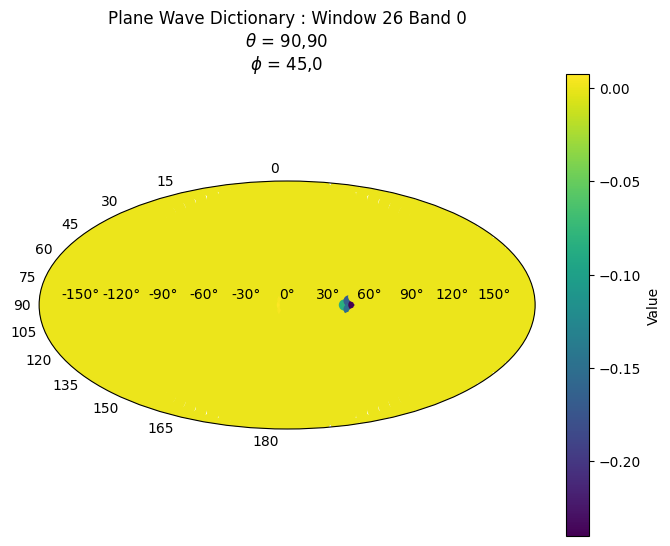

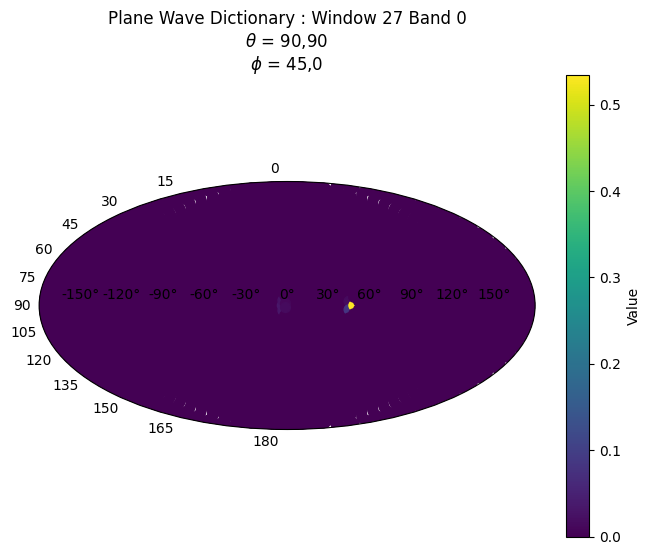

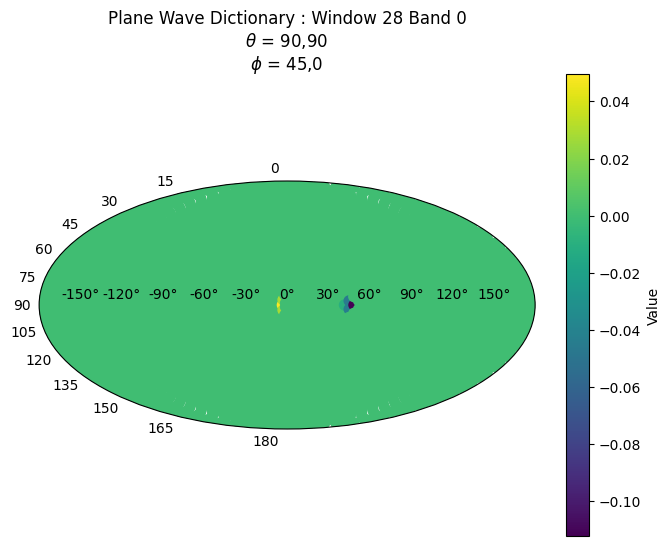

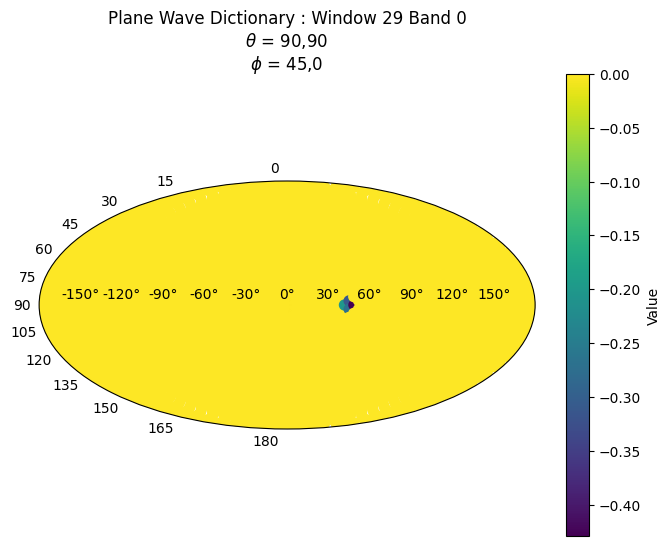

In [9]:
for window_id in range(num_windows):
    for band_id in range(num_bands):
        plot_on_2D(azi=P_ph,zen=P_th,values=data[window_id,band_id,:,0],title=f"Plane Wave Dictionary : Window {window_id} Band {band_id}\n$\\theta$ = {th} \n$\\phi$ = {ph}")


## Audio


In [26]:
s_windowed = np.sum(data, axis=1)
s_dict = s_windowed.transpose(1, 0, 2).reshape(P, tau * num_windows)
print(f"{s_dict.shape=}")


s_dict.shape=(2702, 30720)


In [31]:
wanted_phi = np.pi * (0/180)
wanted_th = np.pi/2
id = np.argmin(np.abs(P_ph - wanted_phi) + np.abs(P_th - wanted_th))
print(f"{math.degrees(P_ph[id])=}\n{math.degrees(P_th[id])=}")

math.degrees(P_ph[id])=0.0
math.degrees(P_th[id])=90.00000250447816


In [33]:
sd.play(s_dict[id], 12000)

In [13]:
s, fs = sf.read(r"data/sound_files/male_speech.wav")
sd.play(s, fs)


## Band Splitting

Band 0
[0.46516944 0.46535793 0.46554471 ... 0.47562123 0.47556616 0.47551113]
Band 1
[0.37716653 0.36940032 0.38160523 ... 0.17418799 0.13969092 0.13249786]
Band 2
[0.3896596  0.38363095 0.38153696 ... 0.46068685 0.4588399  0.45893834]
Band 3
[0.22694957 0.21909264 0.20741598 ... 0.27575565 0.27616337 0.27564907]
Band 4
[0.25047521 0.25171334 0.25283645 ... 0.3235534  0.32345959 0.32343684]
Band 5
[0.48499053 0.49548974 0.51077665 ... 0.53276074 0.52747888 0.52460101]
Band 6
[0.26004828 0.25971014 0.25945457 ... 0.25746141 0.25746372 0.25746527]
Band 7
[0.20637345 0.20326654 0.20107002 ... 0.19812724 0.19812836 0.19812944]
Band 8
[0.41237726 0.28649284 0.19062465 ... 0.34367736 0.18340909 0.36637827]
Band 9
[0.22522456 0.22543559 0.22556534 ... 0.22574348 0.22469684 0.22565122]
Band 10
[0.23710245 0.23734618 0.23795763 ... 0.23736371 0.23775249 0.23809113]
Band 11
[0.1967543  0.23071719 0.25279762 ... 0.22855931 0.2270415  0.2251259 ]
Band 12
[0.28676061 0.33468133 0.41103622 ... 0.42

/var/folders/vz/5yyrmdcn4zg79mzn3dzj2q8h0000gn/T/ipykernel_87648/1568743486.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Band 21
[0.2897085  0.2478825  0.2483855  ... 0.26254635 0.25089461 0.24914543]
Band 22
[0.2346777  0.24160755 0.24610424 ... 0.25418601 0.24461522 0.23417502]
Band 23
[0.24898592 0.24821174 0.25282904 ... 0.29837089 0.40354754 0.44271998]
Band 24
[0.31835842 0.31999224 0.32136239 ... 0.32079993 0.32973741 0.34449538]
Band 25
[0.41721843 0.41519715 0.3869281  ... 0.37747773 0.41333763 0.44420268]
Band 26
[0.45302076 0.55437543 0.47395921 ... 0.42618279 0.42205254 0.45593433]
Band 27
[0.46317497 0.45926658 0.45440759 ... 0.5159632  0.52093043 0.65398411]
Band 28
[0.51486329 0.45414471 0.45921055 ... 0.5400388  0.60713684 0.47001592]
Band 29
[0.42802255 0.4219221  0.37953611 ... 0.32753118 0.32469947 0.32560167]
Band 30
[0.28192207 0.3180302  0.31861735 ... 0.34794372 0.31828093 0.31874608]
Band 31
[0.33475265 0.3335405  0.3346568  ... 0.33310277 0.3334106  0.31908673]
Band 32
[0.3015288  0.30216211 0.31061145 ... 0.32110835 0.52603093 0.30359311]
Band 33
[0.30287116 0.50782726 0.2818337

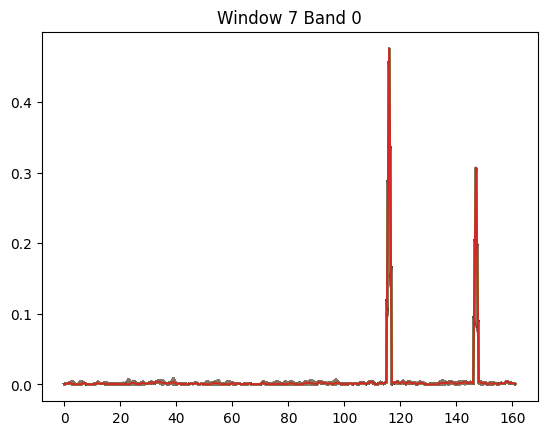

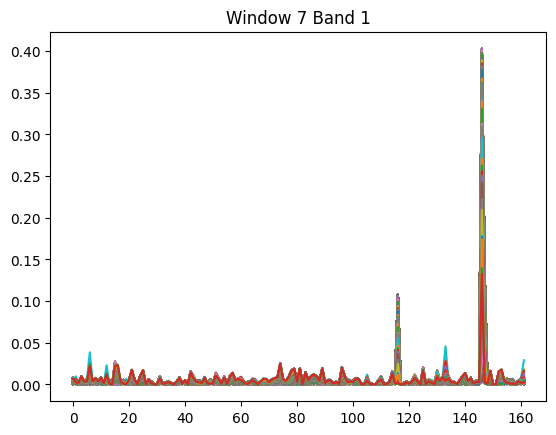

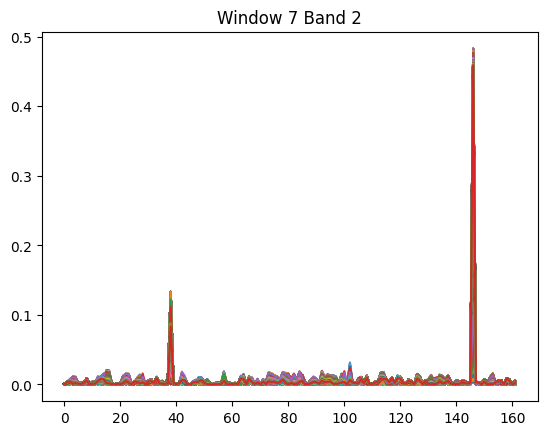

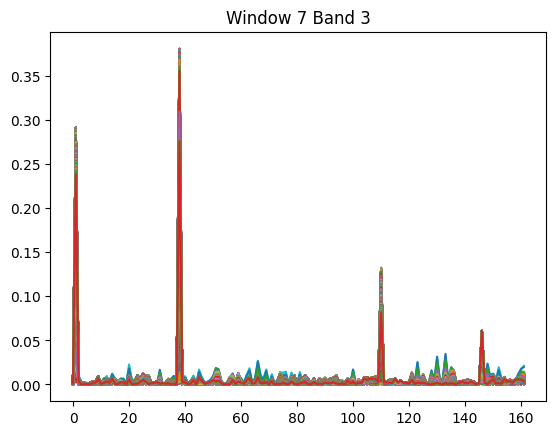

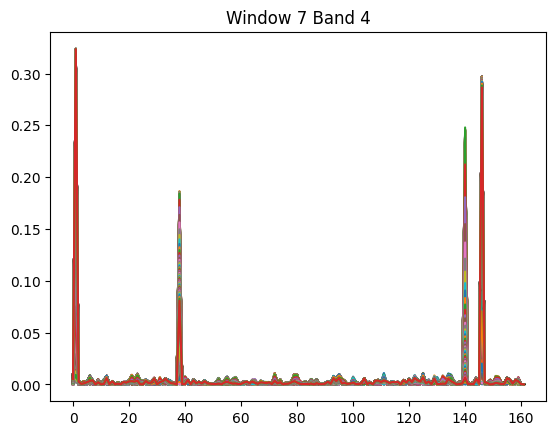

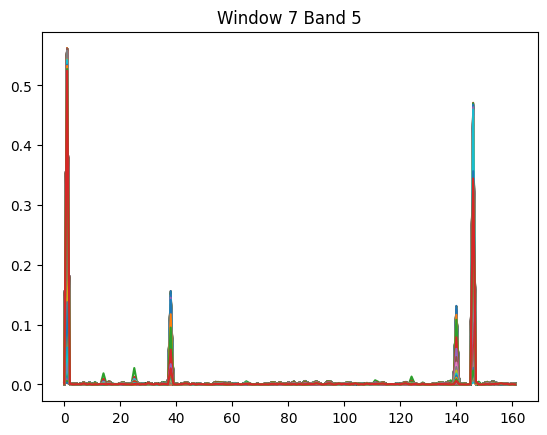

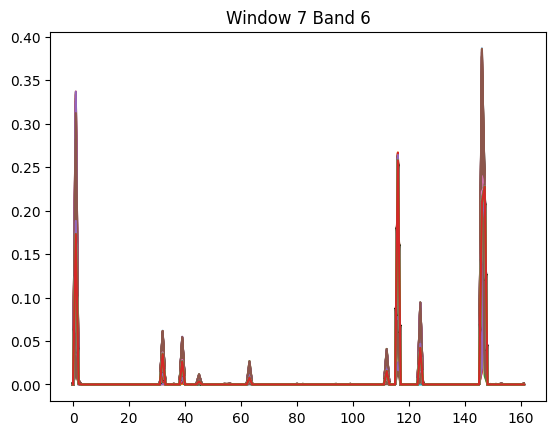

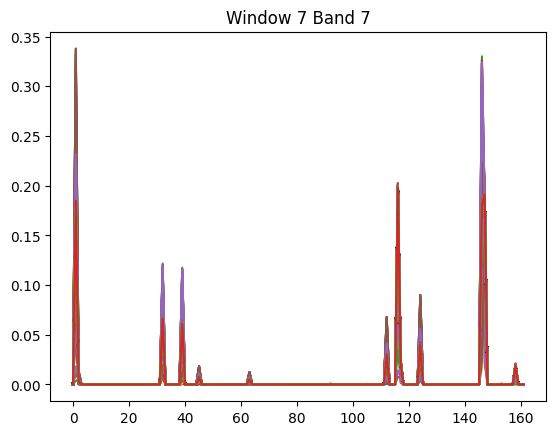

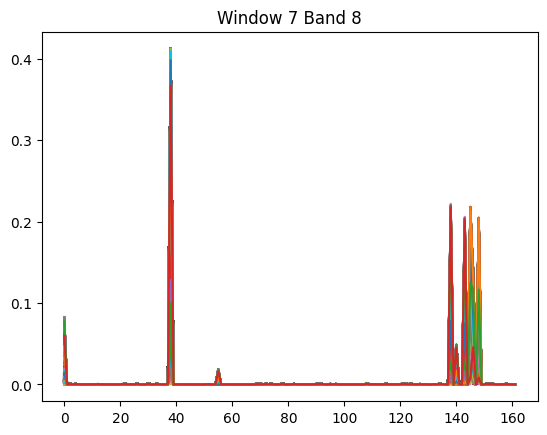

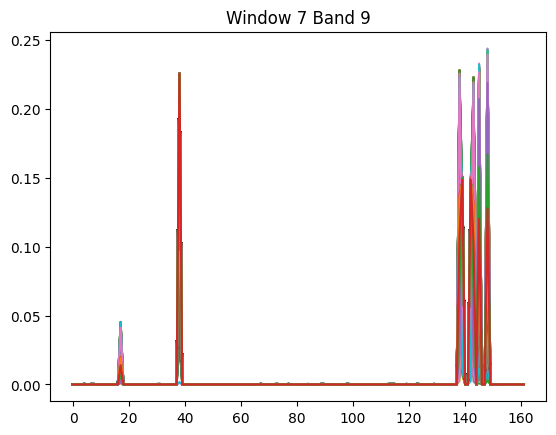

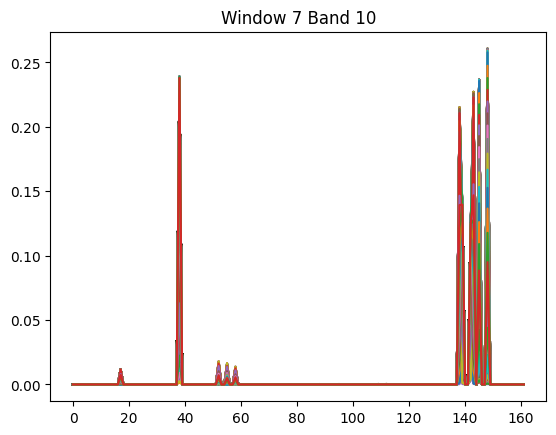

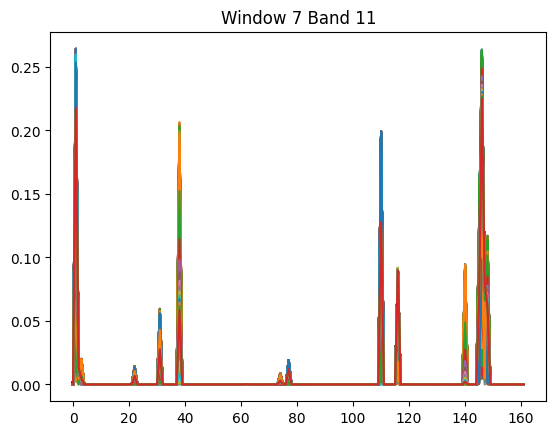

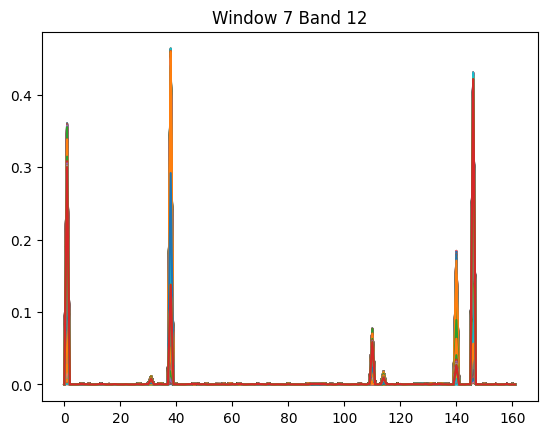

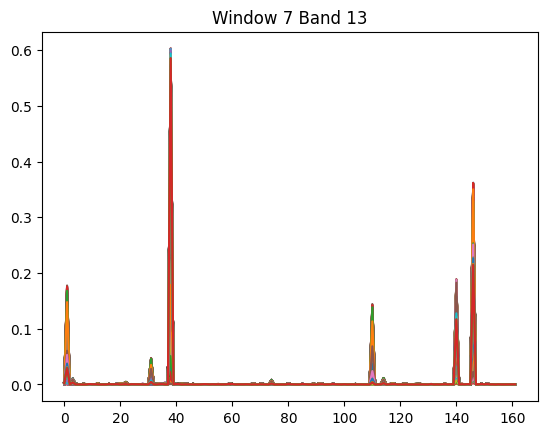

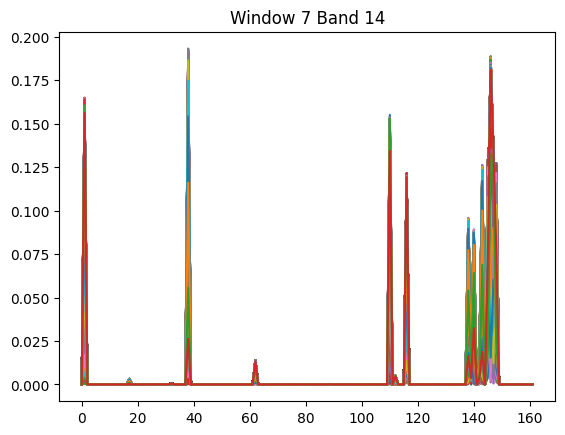

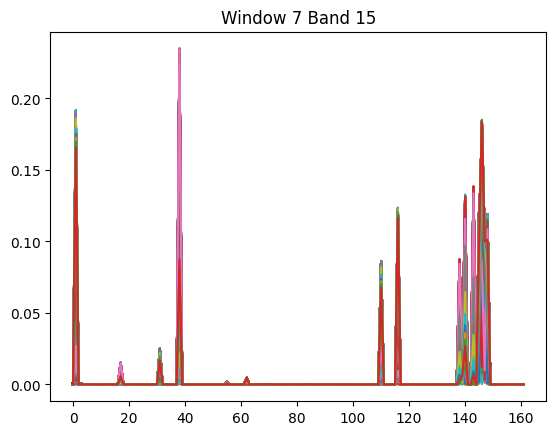

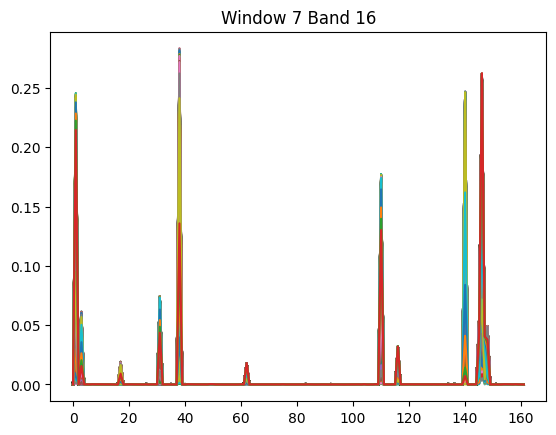

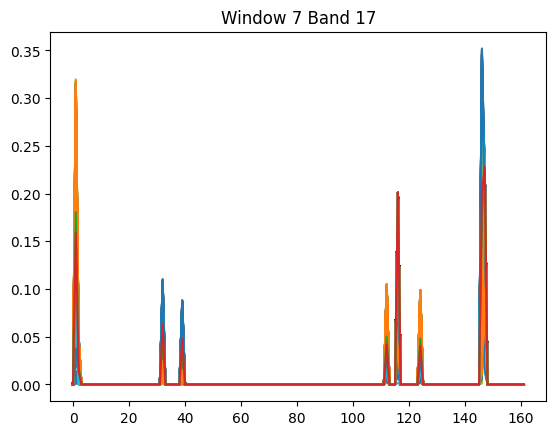

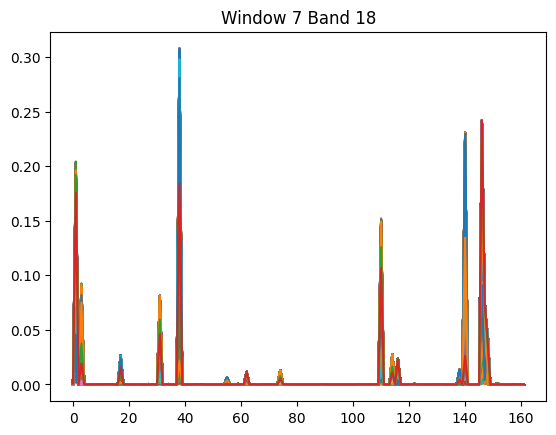

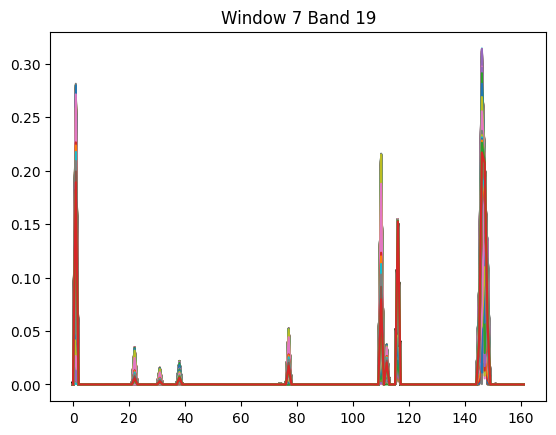

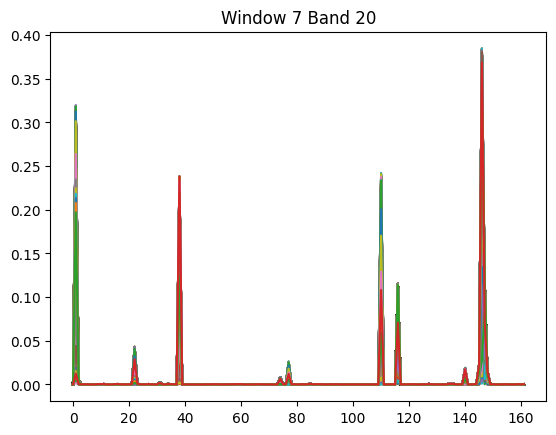

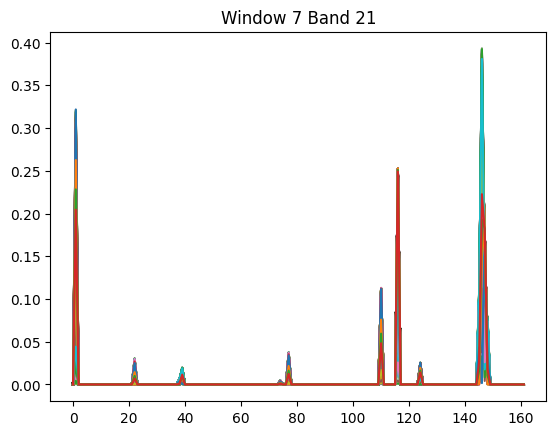

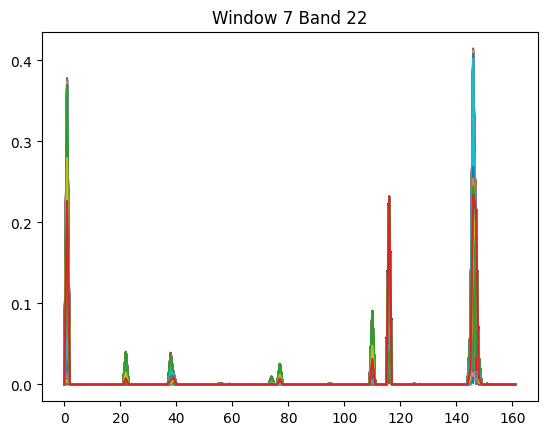

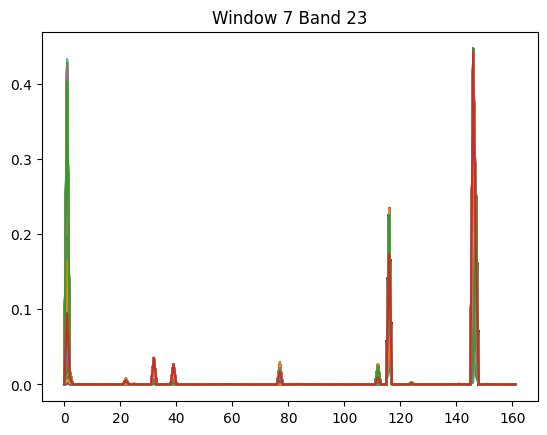

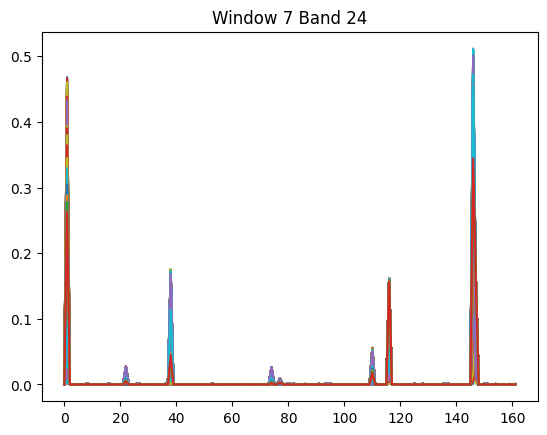

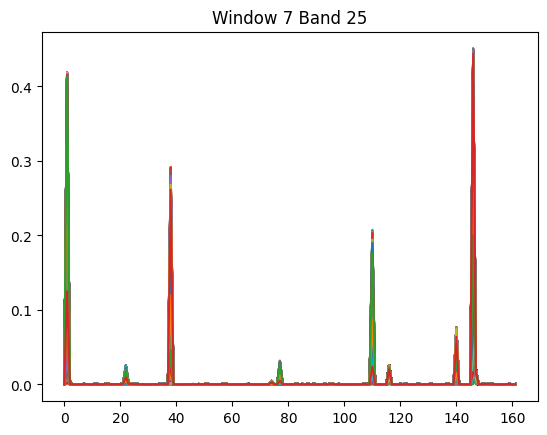

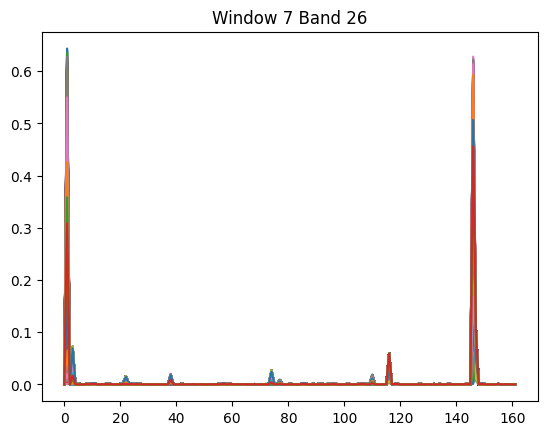

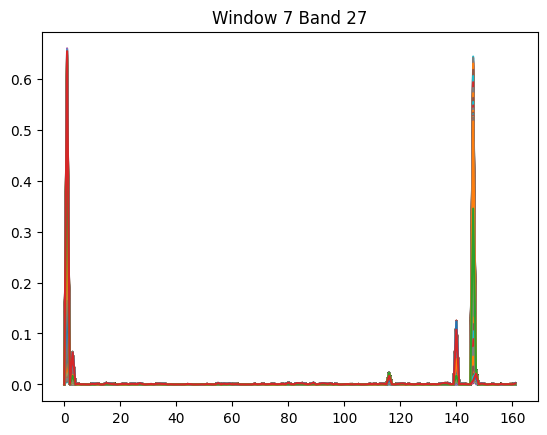

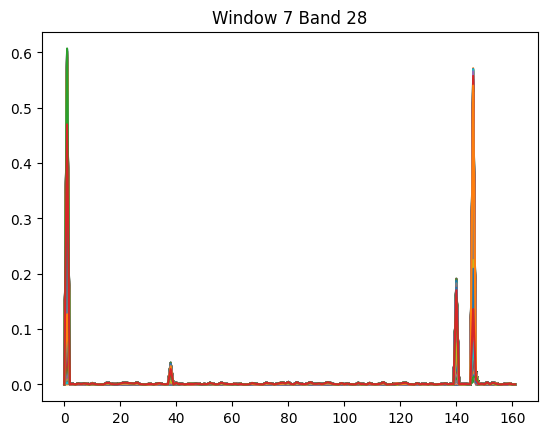

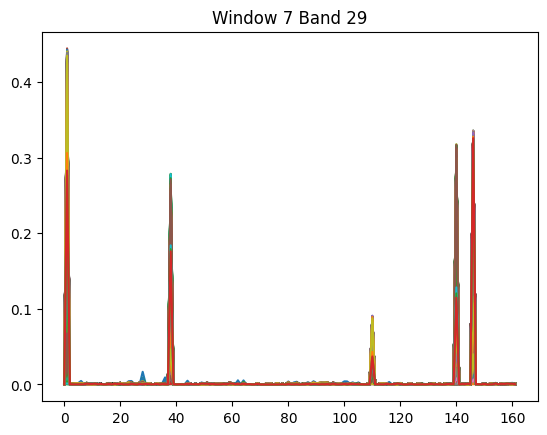

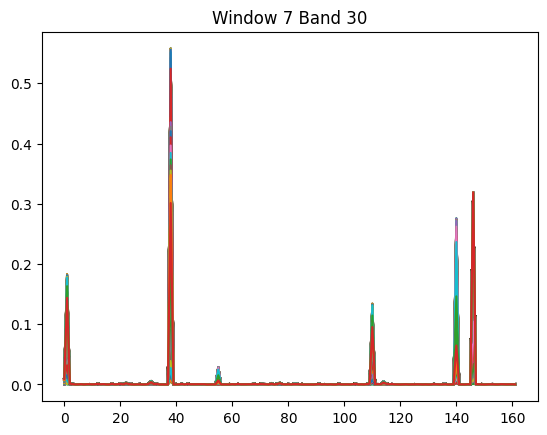

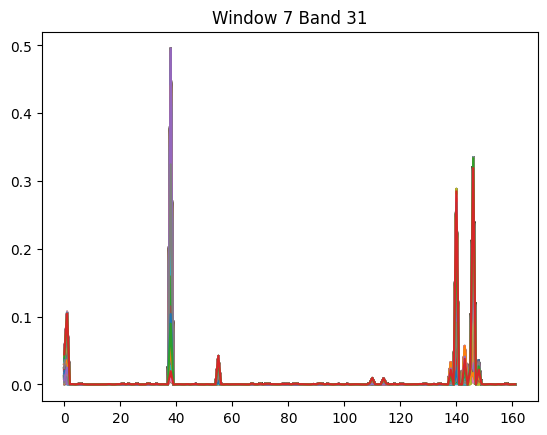

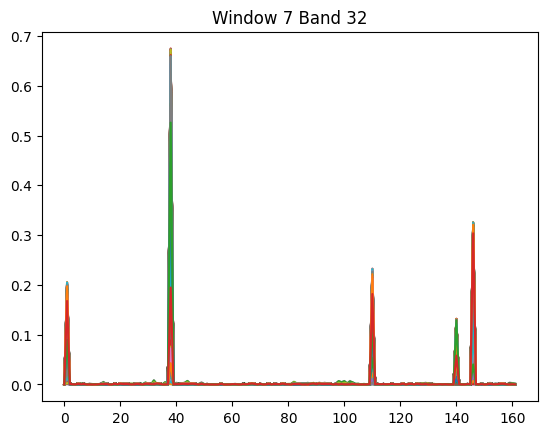

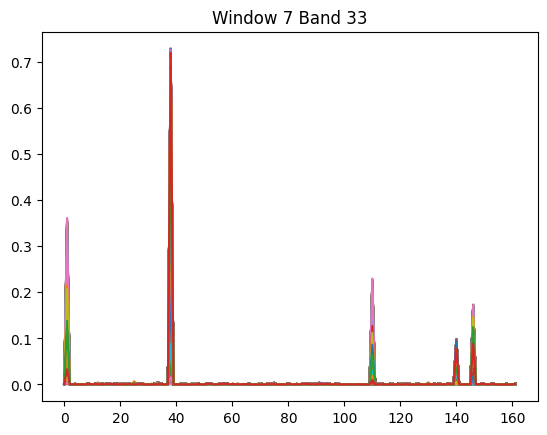

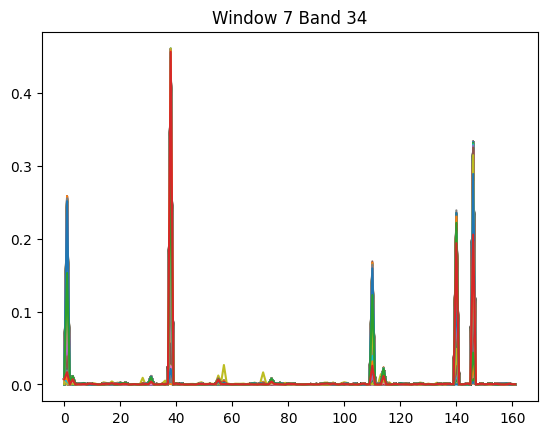

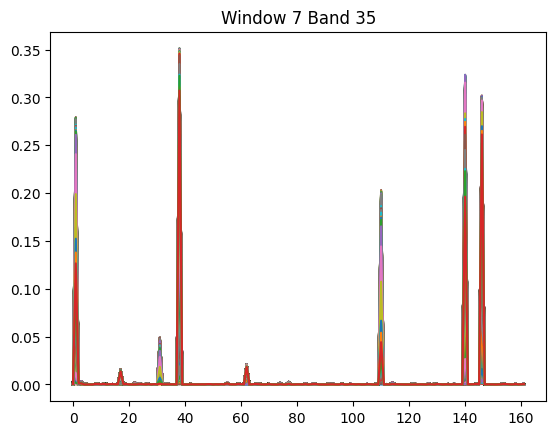

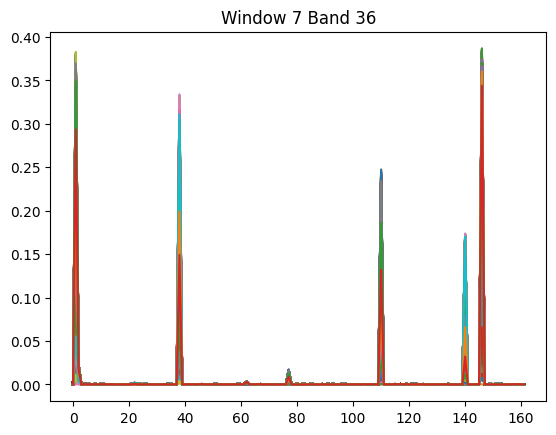

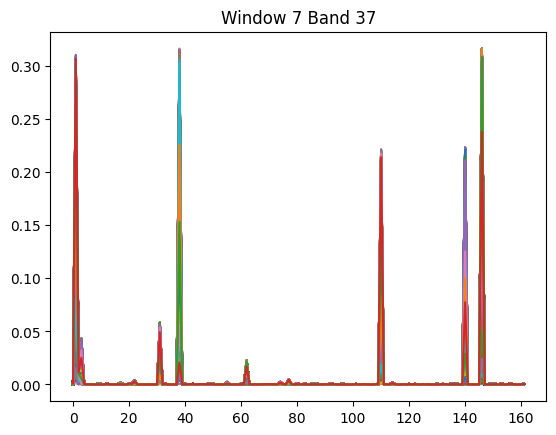

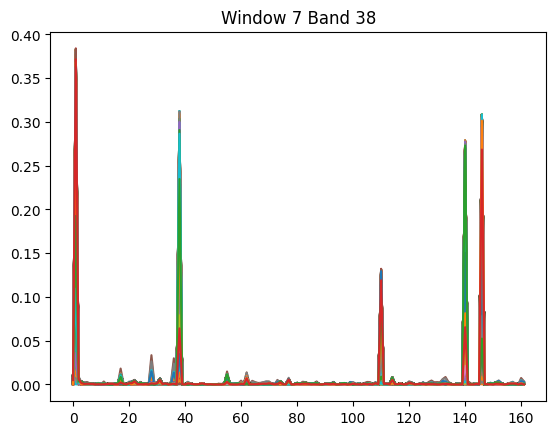

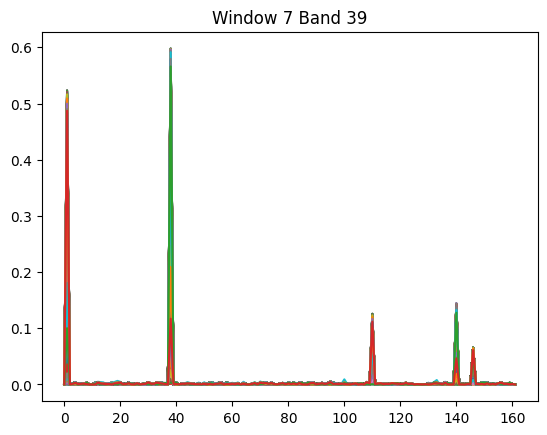

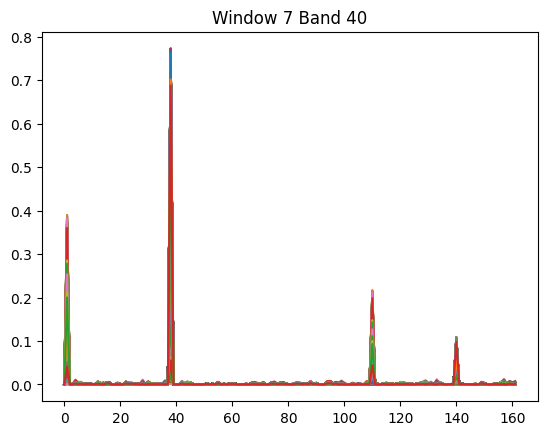

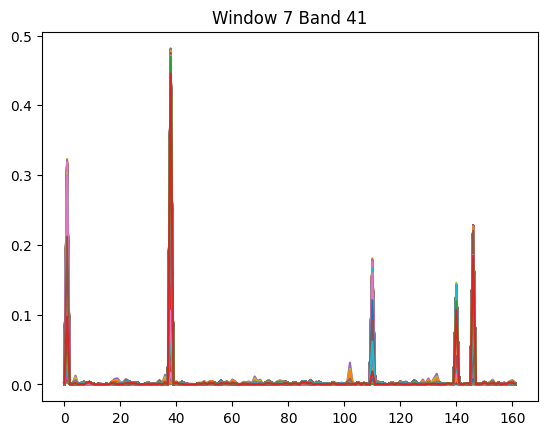

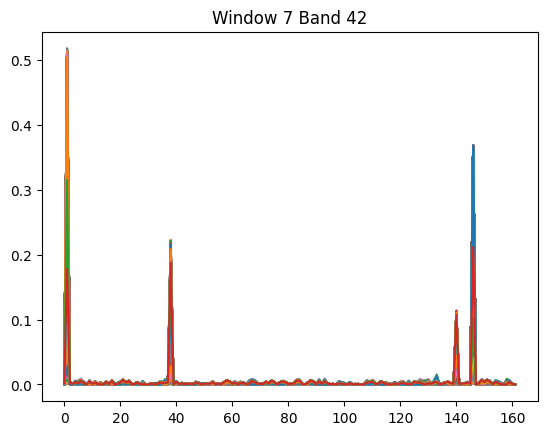

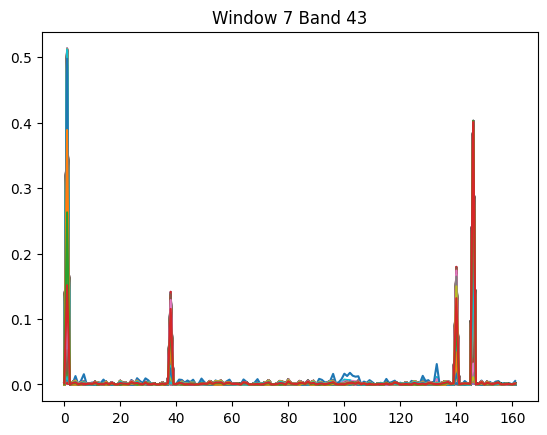

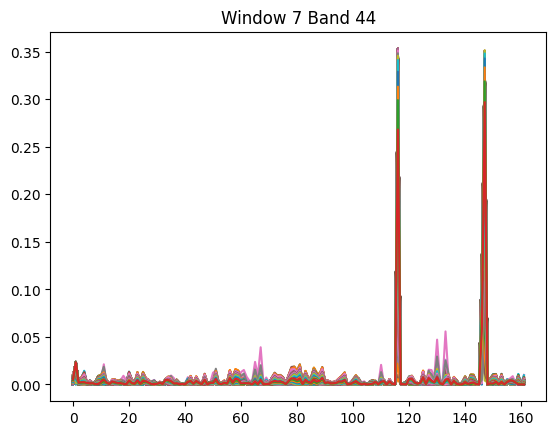

In [45]:
window_id = 7
ids_list = dict()
for band_id in range(num_bands):
    print(f"Band {band_id}")
    plt.figure()
    abs_window = np.abs(data[window_id,band_id,:,:])
    normalize_per_t = np.sum(abs_window,axis=0) # or max
    abs_window /= normalize_per_t 
    plt.plot(abs_window)
    plt.title(f"Window {window_id} Band {band_id}")    
    ids = np.unique((abs_window > 0.35).nonzero()[0])

    ids_list[band_id] = list(ids)


In [43]:
for band,ids in ids_list.items():
    print(f"### {band=} ###")
    for id in ids:
        print(f"{math.degrees(P_ph[id])=} {math.degrees(P_th[id])=}")
    print("\n")

### band=0 ###
math.degrees(P_ph[id])=45.339296721746834 math.degrees(P_th[id])=99.24300322695115


### band=1 ###
math.degrees(P_ph[id])=31.71747441146101 math.degrees(P_th[id])=90.0


### band=2 ###
math.degrees(P_ph[id])=31.71747441146101 math.degrees(P_th[id])=90.0


### band=3 ###
math.degrees(P_ph[id])=0.0 math.degrees(P_th[id])=90.0


### band=4 ###


### band=5 ###
math.degrees(P_ph[id])=58.282525588538995 math.degrees(P_th[id])=90.0
math.degrees(P_ph[id])=31.71747441146101 math.degrees(P_th[id])=90.0


### band=6 ###
math.degrees(P_ph[id])=31.71747441146101 math.degrees(P_th[id])=90.0


### band=7 ###


### band=8 ###
math.degrees(P_ph[id])=0.0 math.degrees(P_th[id])=90.0


### band=9 ###


### band=10 ###


### band=11 ###


### band=12 ###
math.degrees(P_ph[id])=58.282525588538995 math.degrees(P_th[id])=90.0
math.degrees(P_ph[id])=0.0 math.degrees(P_th[id])=90.0
math.degrees(P_ph[id])=31.71747441146101 math.degrees(P_th[id])=90.0


### band=13 ###
math.degrees(P_ph[id])=0.0 

In [46]:
all_ids = list()
for ids in ids_list.values():
    all_ids.extend(ids)
c = Counter(all_ids)
for key,value in c.most_common():
    if value > 1:
        print(f"{math.degrees(P_ph[key])=} {math.degrees(P_th[key])=} {value=}")


math.degrees(P_ph[key])=31.71747441146101 math.degrees(P_th[key])=90.0 value=19
math.degrees(P_ph[key])=58.282525588538995 math.degrees(P_th[key])=90.0 value=17
math.degrees(P_ph[key])=0.0 math.degrees(P_th[key])=90.0 value=13
math.degrees(P_ph[key])=45.339296721746834 math.degrees(P_th[key])=99.24300322695115 value=2
